In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv("Advertising.csv")
x = data["TV"]
y = data["sales"]
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [51]:
def linearEq(x,param):
    return param[0]*x+param[1]

def linearCost(x,y,param):
    yHat = linearEq(x,param)
    n = len(y)
    return (1/n)*sum((y-yHat)**2)

def linearGradient(x,y,param):
    yHat = linearEq(x,param)
    n = len(y)
    return np.array([(-2/n)*np.dot(x,(y-yHat)), (-2/n)*sum(y-yHat)])

In [81]:
def adam(x,y,param, gradFunc, costFunc, iterations=1000, alpha=0.01, beta1=0.8, beta2=0.999):
    ets = 1e-8
    m = np.array([0.0 for _ in range(len(param))])
    v = np.array([0.0 for _ in range(len(param))])
    costVal = []
    
    for t in range(iterations):
        costVal.append(costFunc(x,y,param))
        
        gradVal = gradFunc(x,y,param)

        m = beta1*m + (1.0-beta1)*gradVal
        v = beta2*v + (1.0-beta2)*(gradVal)**2

        mhat = m / (1.0-beta1**(t+1))
        vhat = v / (1.0-beta2**(t+1))
        
        stepSize = (alpha * mhat) / np.sqrt(vhat+ets)
        
        param = param - stepSize
    
    return param, costVal

In [82]:
#beta values varies from 0.8 to 0.999

array([0.08260142, 0.11126785])

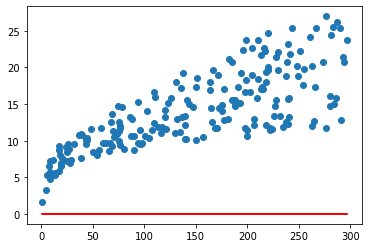

In [97]:
param = np.array([0.0,0.0])

plt.scatter(x,y)
plt.plot(x, linearEq(x,param),"red")

param, costVal = adam(x, y, param, linearGradient, linearCost, 200, 0.001, 0.9, 0.999)

param

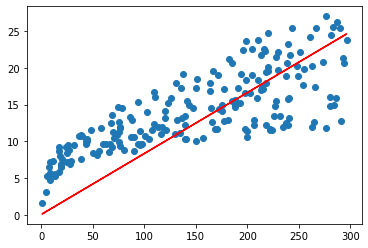

In [98]:
plt.scatter(x,y)
plt.plot(x, linearEq(x,param),"red")

200


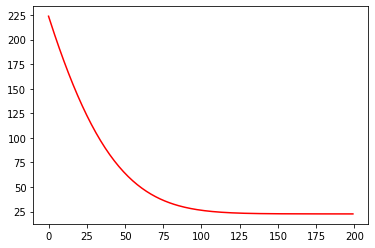

In [99]:
print(len(costVal))
plt.plot(range(len(costVal)),costVal,"red")